In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Project_1/travel_data/Overseas.csv')

In [3]:
df.head()

,SEQ_NO,ALL_KWRD_RANK_CO,SRCHWRD_NM,UPPER_CTGRY_NM,LWPRT_CTGRY_NM,CNTT_NM,COUNTRY_NM,MOBILE_SCCNT_VALUE,PC_SCCNT_VALUE,SCCNT_SM_VALUE,SCCNT_DE
0,19194,1,일본여행,여행,해외여행,아시아,일본,1056,327,1383,20200610
1,19195,2,베트남여행,여행,해외여행,아시아,베트남,630,209,839,20200610
2,19196,3,대만여행,여행,해외여행,아시아,대만,585,174,759,20200610
3,19197,4,발리여행,여행,해외여행,아시아,인도네시아,448,144,592,20200610
4,19198,5,괌여행,여행,해외여행,오세아니아,미국,400,175,575,20200610


In [4]:
df

,SEQ_NO,ALL_KWRD_RANK_CO,SRCHWRD_NM,UPPER_CTGRY_NM,LWPRT_CTGRY_NM,CNTT_NM,COUNTRY_NM,MOBILE_SCCNT_VALUE,PC_SCCNT_VALUE,SCCNT_SM_VALUE,SCCNT_DE
0,19194,1,일본여행,여행,해외여행,아시아,일본,1056,327,1383,20200610
1,19195,2,베트남여행,여행,해외여행,아시아,베트남,630,209,839,20200610
2,19196,3,대만여행,여행,해외여행,아시아,대만,585,174,759,20200610
3,19197,4,발리여행,여행,해외여행,아시아,인도네시아,448,144,592,20200610
4,19198,5,괌여행,여행,해외여행,오세아니아,미국,400,175,575,20200610
...,...,...,...,...,...,...,...,...,...,...,...
8046,9898,6,오사카여행,여행,해외여행,아시아,일본,922,3124,4046,20230302
8047,9899,7,태국여행,여행,해외여행,아시아,태국,650,3118,3768,20230302
8048,9900,8,발리여행,여행,해외여행,아시아,인도네시아,601,3098,3699,20230302
8049,9901,9,세부여행,여행,해외여행,아시아,필리핀,714,2978,3692,20230302


In [5]:
df.isna().sum()

SEQ_NO                0
ALL_KWRD_RANK_CO      0
SRCHWRD_NM            0
UPPER_CTGRY_NM        0
LWPRT_CTGRY_NM        0
CNTT_NM               0
COUNTRY_NM            0
MOBILE_SCCNT_VALUE    0
PC_SCCNT_VALUE        0
SCCNT_SM_VALUE        0
SCCNT_DE              0
dtype: int64

In [6]:
df['UPPER_CTGRY_NM'].unique() #하나 밖에 없음

array(['여행'], dtype=object)

In [7]:
df['LWPRT_CTGRY_NM'].unique() # 하나 밖에 없음

array(['해외여행'], dtype=object)

In [8]:
df = df.drop(columns=['UPPER_CTGRY_NM', 'LWPRT_CTGRY_NM'], axis=1) # 값이 하나밖에 없으므로 삭제하자.

In [9]:
df = df.drop(columns=['SEQ_NO'], axis=1) # 분석하는데 있어서 딱히 필요가 없다.

In [10]:
df

,ALL_KWRD_RANK_CO,SRCHWRD_NM,CNTT_NM,COUNTRY_NM,MOBILE_SCCNT_VALUE,PC_SCCNT_VALUE,SCCNT_SM_VALUE,SCCNT_DE
0,1,일본여행,아시아,일본,1056,327,1383,20200610
1,2,베트남여행,아시아,베트남,630,209,839,20200610
2,3,대만여행,아시아,대만,585,174,759,20200610
3,4,발리여행,아시아,인도네시아,448,144,592,20200610
4,5,괌여행,오세아니아,미국,400,175,575,20200610
...,...,...,...,...,...,...,...,...
8046,6,오사카여행,아시아,일본,922,3124,4046,20230302
8047,7,태국여행,아시아,태국,650,3118,3768,20230302
8048,8,발리여행,아시아,인도네시아,601,3098,3699,20230302
8049,9,세부여행,아시아,필리핀,714,2978,3692,20230302


In [138]:
df['SCCNT_DE'].min()

20200201

In [11]:
# import os
# os.chdir('/content/drive/MyDrive/Project_1/travel_data')
# df.to_csv('Overseas_data.csv', index=False, encoding='utf-8-sig')

In [12]:
df['SCCNT_DE'].value_counts()

20200610    10
20220710    10
20220730    10
20220804    10
20220731    10
            ..
20210509    10
20210512    10
20230302    10
20210228     8
20230326     3
Name: SCCNT_DE, Length: 806, dtype: int64

In [13]:
# 날짜를 기준으로 보여준다.
df_test = df.loc[(df['SCCNT_DE'] <= 20230528) & (df['SCCNT_DE'] >= 20221201), ] # 최근 6개월

In [14]:
group_country = df_test.groupby('COUNTRY_NM')['SCCNT_SM_VALUE'].sum().sort_values(ascending=False)

In [15]:
group_country.keys()

Index(['일본', '대만', '베트남', '싱가포르', '태국', '필리핀', '인도네시아', '미국', '중국', '몽골',
       '스페인', '라오스', '아랍에미리트', '터키', '몰타', '스위스', '말레이시아', '카타르', '요르단',
       '그리스'],
      dtype='object', name='COUNTRY_NM')

In [16]:
group_country.values

array([4395378,  988433,  904160,  749462,  641841,  361350,  171421,
        128318,  110440,  109735,   57510,   33432,   22352,   20231,
          4882,    4621,    4323,    2751,      27,      15])

In [ ]:
sns.barplot(
    x = group_country.keys(),
    y=  group_country.values
) #막대 그래프 보여줌

In [18]:
df_test

,ALL_KWRD_RANK_CO,SRCHWRD_NM,CNTT_NM,COUNTRY_NM,MOBILE_SCCNT_VALUE,PC_SCCNT_VALUE,SCCNT_SM_VALUE,SCCNT_DE
6428,1,일본여행,아시아,일본,3693,17487,21180,20221226
6429,2,후쿠오카여행,아시아,일본,2336,8167,10503,20221226
6430,3,베트남여행,아시아,베트남,1283,7042,8325,20221226
6431,4,오사카여행,아시아,일본,1672,6272,7944,20221226
6432,5,대만여행,아시아,대만,1508,5737,7245,20221226
...,...,...,...,...,...,...,...,...
8046,6,오사카여행,아시아,일본,922,3124,4046,20230302
8047,7,태국여행,아시아,태국,650,3118,3768,20230302
8048,8,발리여행,아시아,인도네시아,601,3098,3699,20230302
8049,9,세부여행,아시아,필리핀,714,2978,3692,20230302


In [19]:
# 도시별 검색어 종류
country_srch = df_test.loc[df_test['COUNTRY_NM'] == '미국', ['SRCHWRD_NM']].value_counts()

In [20]:
country_srch

SRCHWRD_NM
괌여행           32
하와이여행          2
dtype: int64

In [21]:
country_srch.keys().get_level_values(0)

Index(['괌여행', '하와이여행'], dtype='object', name='SRCHWRD_NM')

<Axes: xlabel='SRCHWRD_NM'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44300 (\N{HANGUL SYLLABLE GWAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*arg

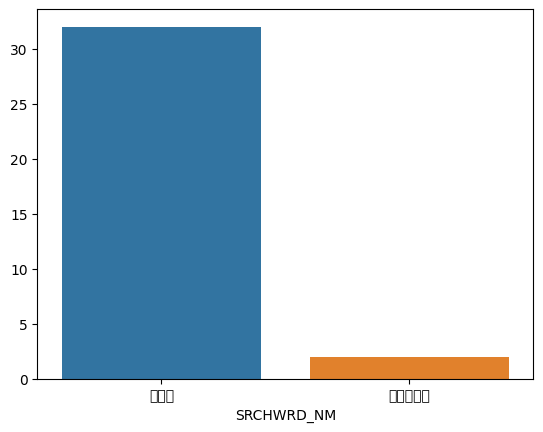

In [22]:
sns.barplot(
   x = country_srch.keys().get_level_values(0),
   y = country_srch.values
)

In [23]:
df_test.groupby('CNTT_NM')['SCCNT_SM_VALUE'].sum().sort_values(ascending = False)

CNTT_NM
아시아      8495105
오세아니아     120651
유럽         87259
북아메리카       7667
Name: SCCNT_SM_VALUE, dtype: int64

In [24]:
group_country = df_test.groupby('COUNTRY_NM')['MOBILE_SCCNT_VALUE','PC_SCCNT_VALUE'].sum().sort_values(['PC_SCCNT_VALUE'], ascending=False).iloc[:10, ]
group_country

<ipython-input-24-56a8b9809ad5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_country = df_test.groupby('COUNTRY_NM')['MOBILE_SCCNT_VALUE','PC_SCCNT_VALUE'].sum().sort_values(['PC_SCCNT_VALUE'], ascending=False).iloc[:10, ]


,MOBILE_SCCNT_VALUE,PC_SCCNT_VALUE
COUNTRY_NM,,
일본,771610,3623768
대만,157279,831154
베트남,106545,797615
싱가포르,90919,658543
태국,85359,556482
필리핀,59496,301854
인도네시아,17763,153658
미국,24284,104034
몽골,10172,99563


In [25]:
group_country.index

Index(['일본', '대만', '베트남', '싱가포르', '태국', '필리핀', '인도네시아', '미국', '몽골', '중국'], dtype='object', name='COUNTRY_NM')

In [ ]:
sns.barplot(
    x = group_country.index,
    y = 'MOBILE_SCCNT_VALUE',
    data = group_country
)

In [ ]:
sns.barplot(
    x = group_country.index,
    y = 'PC_SCCNT_VALUE',
    data = group_country
)

In [50]:
df_train = pd.DataFrame()

In [96]:
df_train.shape

(0, 0)

In [97]:
df.shape

(8051, 8)

In [49]:
from sklearn.preprocessing import OneHotEncoder#, #LabelEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df['COUNTRY_NM'].to_frame()

In [65]:
df['COUNTRY_NM'].nunique()

43

In [70]:
df['COUNTRY_NM'].value_counts().shape

(43,)

In [115]:
col_names = sorted(df['COUNTRY_NM'].unique())
df_train = pd.get_dummies(df['COUNTRY_NM'])

In [127]:
df_train['SCCNT_SM_VALUE'] = df['SCCNT_SM_VALUE']

In [122]:
df_train

,그리스,뉴질랜드,대만,라오스,러시아,말레이시아,모로코,몰타,몽골,미국,...,콜롬비아,쿠바,태국,터키,팔라우,프랑스,필리핀,호주,ALL_KWRD_RANK_CO,SCCNT_DE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20200610
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,20200610
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,20200610
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,20200610
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,20200610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,20230302
8047,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,7,20230302
8048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,20230302
8049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,9,20230302


In [ ]:
# ct = ColumnTransformer([
#           ('encoder', OneHotEncoder(), [0])  
#         ], remainder='passthrough')
# col_names = sorted(df['COUNTRY_NM'].unique())
# df_train[col_names] = ct.fit_transform(df['COUNTRY_NM'].to_frame())

In [31]:
# label_encoder = LabelEncoder()
# df_train['COUNTRY_NM'] = label_encoder.fit_transform(df_train['COUNTRY_NM'])

In [ ]:
df['COUNTRY_NM'].value_counts()

In [ ]:
df_train['COUNTRY_NM'].value_counts()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [35]:
df.head(3)

,ALL_KWRD_RANK_CO,SRCHWRD_NM,CNTT_NM,COUNTRY_NM,MOBILE_SCCNT_VALUE,PC_SCCNT_VALUE,SCCNT_SM_VALUE,SCCNT_DE
0,1,일본여행,아시아,일본,1056,327,1383,20200610
1,2,베트남여행,아시아,베트남,630,209,839,20200610
2,3,대만여행,아시아,대만,585,174,759,20200610


In [36]:
df_train.head(3)

,ALL_KWRD_RANK_CO,SRCHWRD_NM,CNTT_NM,COUNTRY_NM,MOBILE_SCCNT_VALUE,PC_SCCNT_VALUE,SCCNT_SM_VALUE,SCCNT_DE
0,1,일본여행,아시아,27,1056,327,1383,20200610
1,2,베트남여행,아시아,10,630,209,839,20200610
2,3,대만여행,아시아,2,585,174,759,20200610


In [ ]:
df_train[['SCCNT_DE', 'COUNTRY_NM']]

In [38]:
df_train['ALL_KWRD_RANK_CO']

0        1
1        2
2        3
3        4
4        5
        ..
8046     6
8047     7
8048     8
8049     9
8050    10
Name: ALL_KWRD_RANK_CO, Length: 8051, dtype: int64

In [125]:
df_train

,그리스,뉴질랜드,대만,라오스,러시아,말레이시아,모로코,몰타,몽골,미국,...,콜롬비아,쿠바,태국,터키,팔라우,프랑스,필리핀,호주,ALL_KWRD_RANK_CO,SCCNT_DE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20200610
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,20200610
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,20200610
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,20200610
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,20200610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,20230302
8047,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,7,20230302
8048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,20230302
8049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,9,20230302


In [136]:
test_list = []
for i in range(50):
  X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(['ALL_KWRD_RANK_CO'], axis=1),
    df_train['ALL_KWRD_RANK_CO'],
    stratify= df_train['ALL_KWRD_RANK_CO'],
)
  model = LogisticRegression(max_iter=10000)
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)
  test_list.append(score)

In [137]:
test_list

[0.13760556383507203,
 0.13412816691505217,
 0.12816691505216096,
 0.14058618976651763,
 0.13710879284649777,
 0.13561847988077497,
 0.12965722801788376,
 0.14157973174366617,
 0.13462493790362642,
 0.12816691505216096,
 0.12419274714356682,
 0.12965722801788376,
 0.13114754098360656,
 0.13760556383507203,
 0.12270243417784402,
 0.13710879284649777,
 0.1366120218579235,
 0.14505712866368603,
 0.13313462493790362,
 0.12369597615499255,
 0.13561847988077497,
 0.12816691505216096,
 0.12866368604073522,
 0.13561847988077497,
 0.14505712866368603,
 0.1366120218579235,
 0.13859910581222057,
 0.13363139592647788,
 0.13412816691505217,
 0.13412816691505217,
 0.12717337307501242,
 0.13065076999503228,
 0.13859910581222057,
 0.11972180824639841,
 0.13760556383507203,
 0.12667660208643816,
 0.1381023348236463,
 0.12518628912071536,
 0.12319920516641829,
 0.13412816691505217,
 0.12866368604073522,
 0.1381023348236463,
 0.13611525086934922,
 0.13363139592647788,
 0.13462493790362642,
 0.13512170889

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train[['SCCNT_DE', 'COUNTRY_NM', 'SCCNT_SM_VALUE']],
    df_train['ALL_KWRD_RANK_CO'],
    stratify= df_train['ALL_KWRD_RANK_CO'],
    random_state=500
)

In [42]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
model.score(X_train, y_train)

0.12984431931103013

In [43]:
pred_test = model.predict(X_test)
model.score(X_test, y_test)

0.1410829607550919

In [44]:
27	20200610

SyntaxError: ignored

In [ ]:
y_pred = model.predict(np.array([20200610, 27]).reshape(1, -1))

In [ ]:
print(y_pred)